# 신경망 학습

In [8]:
# 라이브러리
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

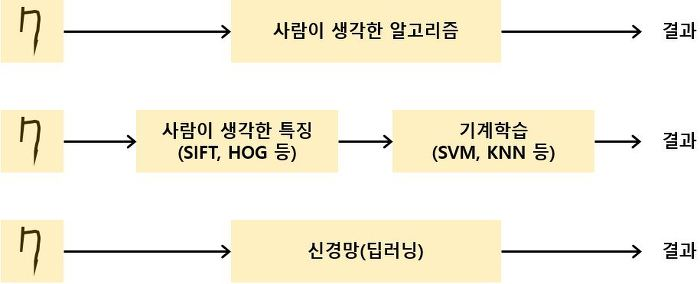

데이터를 이용해 결과를 내는 세 가지 방법

두 번째 방법에서는 접근 방법을 사람이 설정

신경망은 입력 데이터에 어떤 특징이 중요한지도 기계가 학습한다. (가중치를 수정해가면서)

따라서 end-to-end 라고도 한다.

# 손실 함수

In [9]:
# 오차제곱합
def sum_squares_error(y, t): 
  return 0.5 * np.sum((y-t)**2)

# 원 핫 인코딩
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답 2

# 신경망의 출력 2인 경우
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

# 신경망의 출력이 7인 경우
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


In [10]:
# 크로스 엔트로피
def cross_entropy_error(y, t):
  delta = 1e-7 # log에 0 이 입력되는 사태 방지
  return -np.sum(t * np.log(y + delta)) 

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


In [11]:
path = '/content/drive/MyDrive/deep-learning-from-scratch-master'
os.chdir(path)
sys.path.append(os.chdir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape, '\n')

(60000, 784)
(60000, 10) 



In [12]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

#x_batch = x_train[batch_mask]
#t_batch = t_train[batch_mask]
print(batch_mask)
print(np.random.choice(60000, 10))

[19532 53765 33859 26817 14064  6740 10493   420 23243 59386]
[58050 31841 10687 41276  3553 35828 45135 15967 15018  5067]


In [13]:
# 미니배치를 위한 교차 엔트로피 오차 구현

# Case 1 : 정답 레이블이 원-핫 인코딩인 경우
def cross_entropy_error(y, t):   # y : 신경망 출력, t : 정답 레이블
  if y.ndim == 1:    # y가 1차원이다 => 데이터 하나당 교차 엔트로피 오차를 구한다 의 경우
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

  정확도를 놔두고 '손실함수' 를 사용하는 이유 => 미분
  - 우리 목적은 '높은 정확도'를 끌어내는 매개변수(가중치, 편향)을 찾는거임
  - 미분 값을 근거로 매개변수의 값을 갱신하면서 찾을 수 있음
  - 근데 정확도를 지표로 삼고 미분하면 대부분 장소에서 0 이 되기 떄문에 찾기 힘들다.

In [14]:
# Case 2 : 정답 레이블이 단순 레이블 형태인 경우
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size